In [47]:
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', 50)


In [48]:
df = pd.read_csv('train_weather_per_station.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head()

Num_Duplicates  WnvPresent  Year  Month  Day  CULEX ERRATICUS  \
Date                                                                        
2007-05-29               1           0  2007      5   29                0   
2007-05-29               1           0  2007      5   29                0   
2007-05-29               1           0  2007      5   29                0   
2007-05-29               1           0  2007      5   29                0   
2007-05-29               1           0  2007      5   29                0   

            CULEX PIPIENS  CULEX PIPIENS/RESTUANS  CULEX RESTUANS  \
Date                                                                
2007-05-29              0                       1               0   
2007-05-29              0                       0               1   
2007-05-29              0                       0               1   
2007-05-29              0                       1               0   
2007-05-29              0                       0               1   

            CULEX SALINARIUS  CULEX TARSALIS  CULEX TERRITANS  Tmax  Tmin  \
Date                                                                        
2007-05-29                 0               0                0    88    60   
2007-05-29                 0               0                0    88    60   
2007-05-29                 0               0                0    88    60   
2007-05-29                 0               0                0    88    60   
2007-05-29                 0               0                0    88    60   

            Tavg  Depart  DewPoint  WetBulb  Cool  Sunrise  Sunset  \
Date                                                                 
2007-05-29    74      10        58       65     9      421    1917   
2007-05-29    74      10        58       65     9      421    1917   
2007-05-29    74      10        58       65     9      421    1917   
2007-05-29    74      10        58       65     9      421    1917   
2007-05-29    74      10        58       65     9      421    1917   

            PrecipTotal  ResultSpeed  ResultDir  
Date                                             
2007-05-29          0.0          5.8         18  
2007-05-29          0.0          5.8         18  
2007-05-29          0.0          5.8         18  
2007-05-29          0.0          5.8         18  
2007-05-29          0.0          5.8         18

In [49]:
test = pd.read_csv('test_weather_per_station.csv')
test['Date'] = pd.to_datetime(test['Date'])
test.set_index('Date', inplace = True)
test.head()

Num_Duplicates  Year  Month  Day  CULEX ERRATICUS  CULEX PIPIENS  \
Date                                                                           
2008-06-11               1  2008      6   11                0              0   
2008-06-11               1  2008      6   11                0              0   
2008-06-11               1  2008      6   11                0              1   
2008-06-11               1  2008      6   11                0              0   
2008-06-11               1  2008      6   11                0              0   

            CULEX PIPIENS/RESTUANS  CULEX RESTUANS  CULEX SALINARIUS  \
Date                                                                   
2008-06-11                       1               0                 0   
2008-06-11                       0               1                 0   
2008-06-11                       0               0                 0   
2008-06-11                       0               0                 1   
2008-06-11                       0               0                 0   

            CULEX TARSALIS  CULEX TERRITANS  UNSPECIFIED CULEX  Tmax  Tmin  \
Date                                                                         
2008-06-11               0                0                  0    86    61   
2008-06-11               0                0                  0    86    61   
2008-06-11               0                0                  0    86    61   
2008-06-11               0                0                  0    86    61   
2008-06-11               0                1                  0    86    61   

            Tavg  Depart  DewPoint  WetBulb  Cool  Sunrise  Sunset  \
Date                                                                 
2008-06-11    74       7        56       64     9      416    1926   
2008-06-11    74       7        56       64     9      416    1926   
2008-06-11    74       7        56       64     9      416    1926   
2008-06-11    74       7        56       64     9      416    1926   
2008-06-11    74       7        56       64     9      416    1926   

            PrecipTotal  ResultSpeed  ResultDir  
Date                                             
2008-06-11          0.0          8.9         18  
2008-06-11          0.0          8.9         18  
2008-06-11          0.0          8.9         18  
2008-06-11          0.0          8.9         18  
2008-06-11          0.0          8.9         18

In [19]:
virus_by_year = df[df['WnvPresent'] == 1].groupby('Year').sum()['WnvPresent']
virus_by_year = pd.DataFrame(virus_by_year)
virus_by_year

WnvPresent
Year            
2007         717
2009          37
2011         115
2013         349

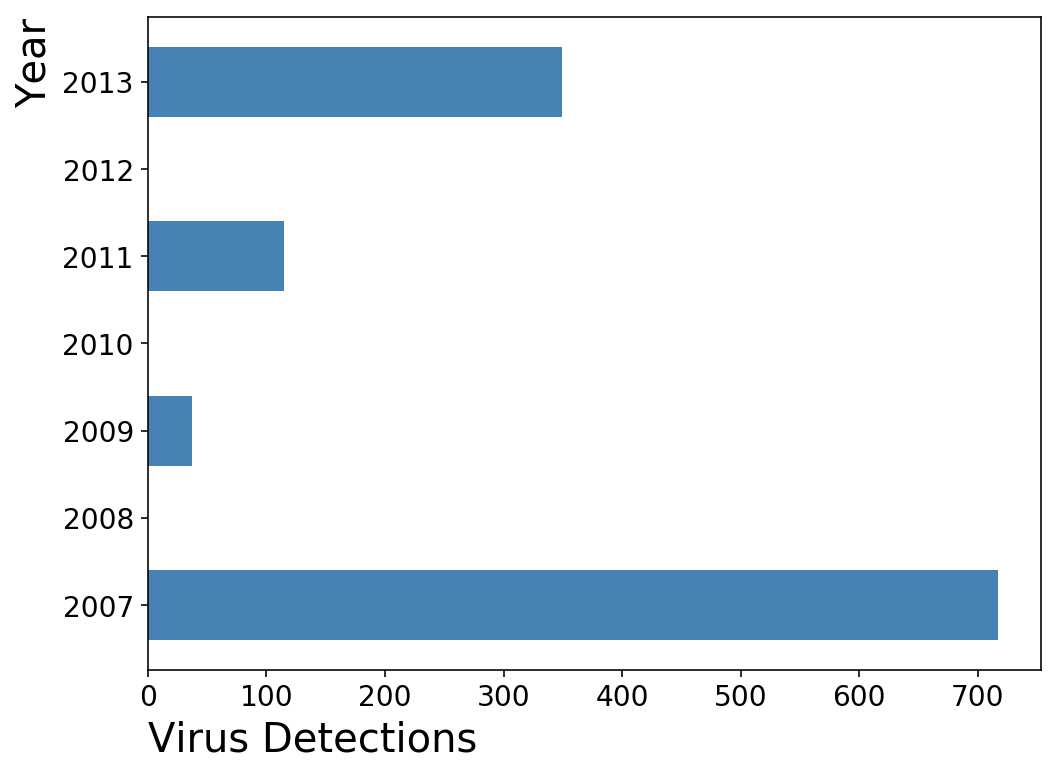

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.barh(virus_by_year.index, virus_by_year['WnvPresent'], color = 'steelblue')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Year', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);

In [39]:
virus_by_month = df[df['WnvPresent'] == 1].groupby('Month').sum()['WnvPresent']
virus_by_month = pd.DataFrame(virus_by_month)
virus_by_month

WnvPresent
Month            
6               1
7             165
8             818
9             232
10              2

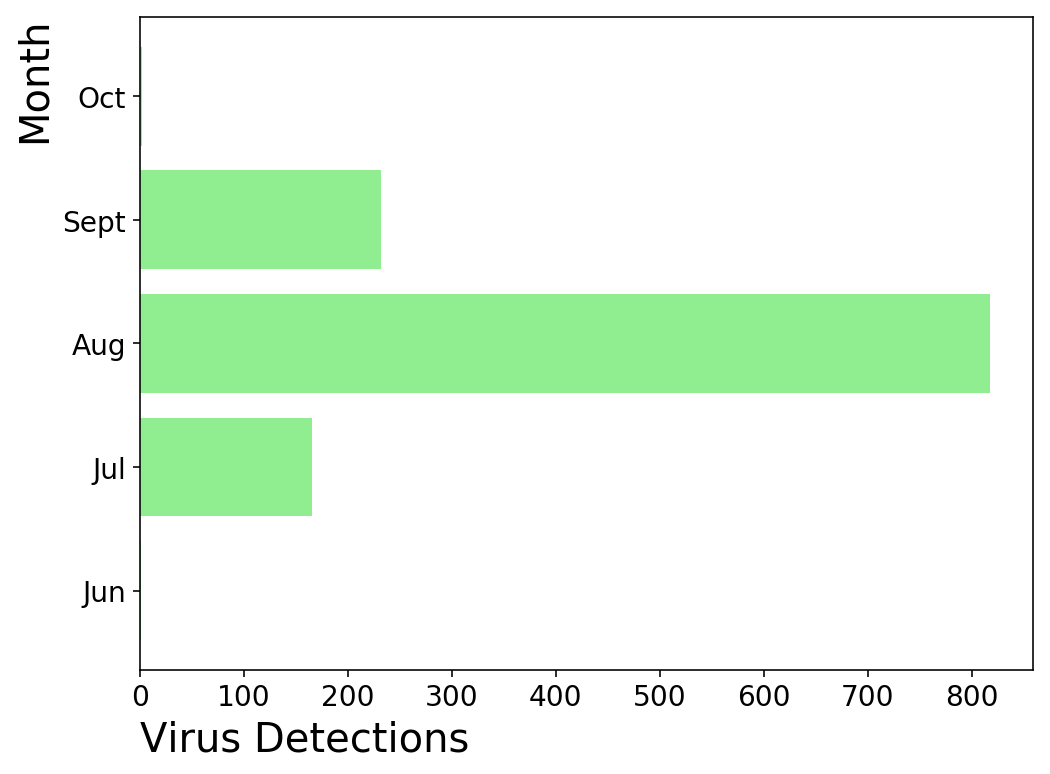

In [44]:
plt.figure(figsize=(8,6))
plt.barh(virus_by_month.index, virus_by_month['WnvPresent'], color = 'lightgreen')
plt.xticks(fontsize = 14)
plt.yticks(virus_by_month.index,['Jun','Jul','Aug','Sept','Oct'],fontsize = 14)
plt.ylabel('Month', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);

In [56]:
virus_by_species = df[df['WnvPresent'] == 1][['CULEX ERRATICUS', 'CULEX PIPIENS','CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX SALINARIUS',
                         'CULEX TARSALIS', 'CULEX TERRITANS']].sum()
virus_by_species = pd.DataFrame(virus_by_species, columns=['virus_detections'])
virus_by_species

virus_detections
CULEX ERRATICUS                        0
CULEX PIPIENS                        679
CULEX PIPIENS/RESTUANS               457
CULEX RESTUANS                        82
CULEX SALINARIUS                       0
CULEX TARSALIS                         0
CULEX TERRITANS                        0

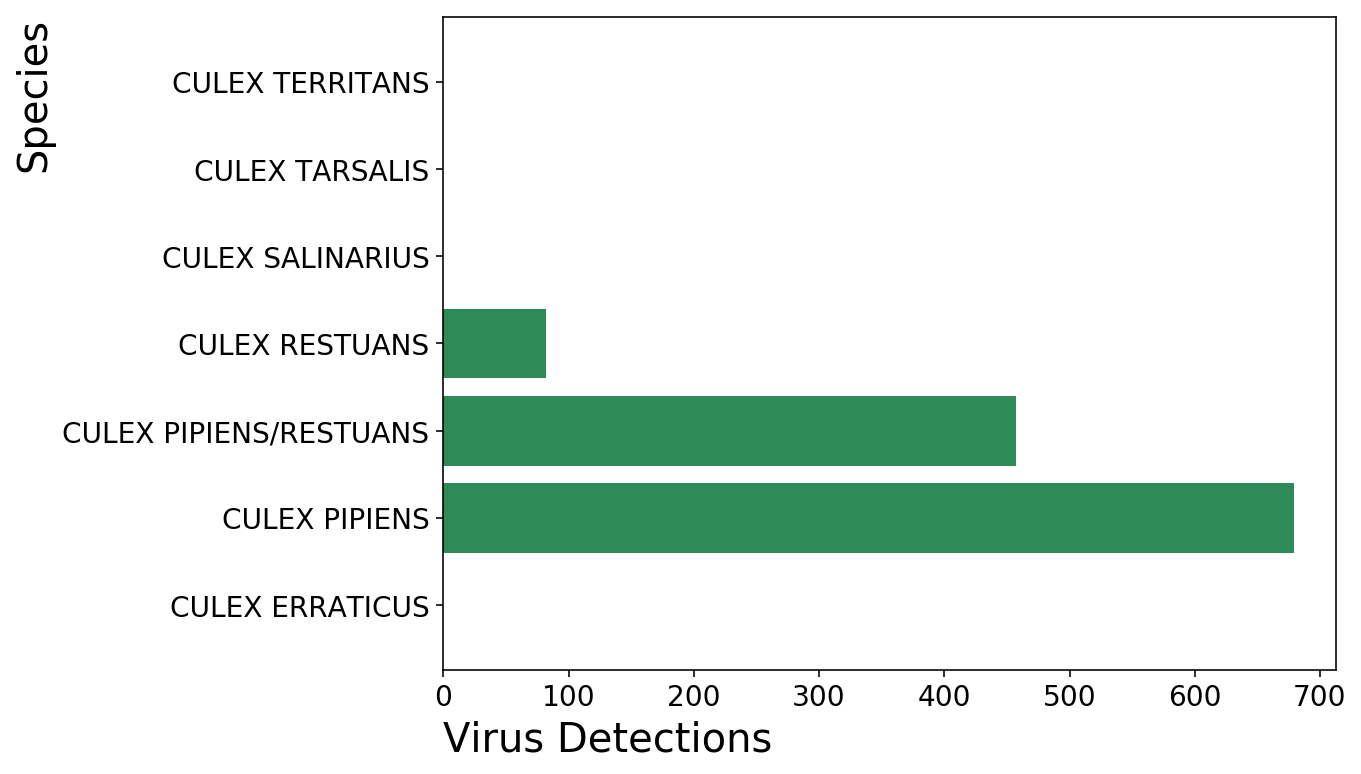

In [60]:
plt.figure(figsize=(8,6))
plt.barh(virus_by_species.index, virus_by_species['virus_detections'], color = 'seagreen')
plt.xticks(fontsize = 14)
plt.yticks(virus_by_species.index,fontsize = 14)
plt.ylabel('Species', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);

In [85]:
virus_by_precipitation = df[df['WnvPresent'] == 1].groupby(['PrecipTotal']).sum()['WnvPresent']
virus_by_precipitation = pd.DataFrame(virus_by_precipitation)
virus_by_precipitation['number'] = range(virus_by_precipitation.shape[0])
virus_by_precipitation

WnvPresent  number
PrecipTotal                    
0.000               759       0
0.001                64       1
0.010                20       2
0.030                 2       3
0.060                16       4
0.080                 9       5
0.090                73       6
0.140                 5       7
0.160                 2       8
0.190                 1       9
0.200                19      10
0.230                54      11
0.240                11      12
0.360                19      13
0.460                 1      14
0.580                25      15
0.700                15      16
0.830                18      17
0.840                 8      18
0.880                86      19
0.920                 2      20
1.310                 9      21

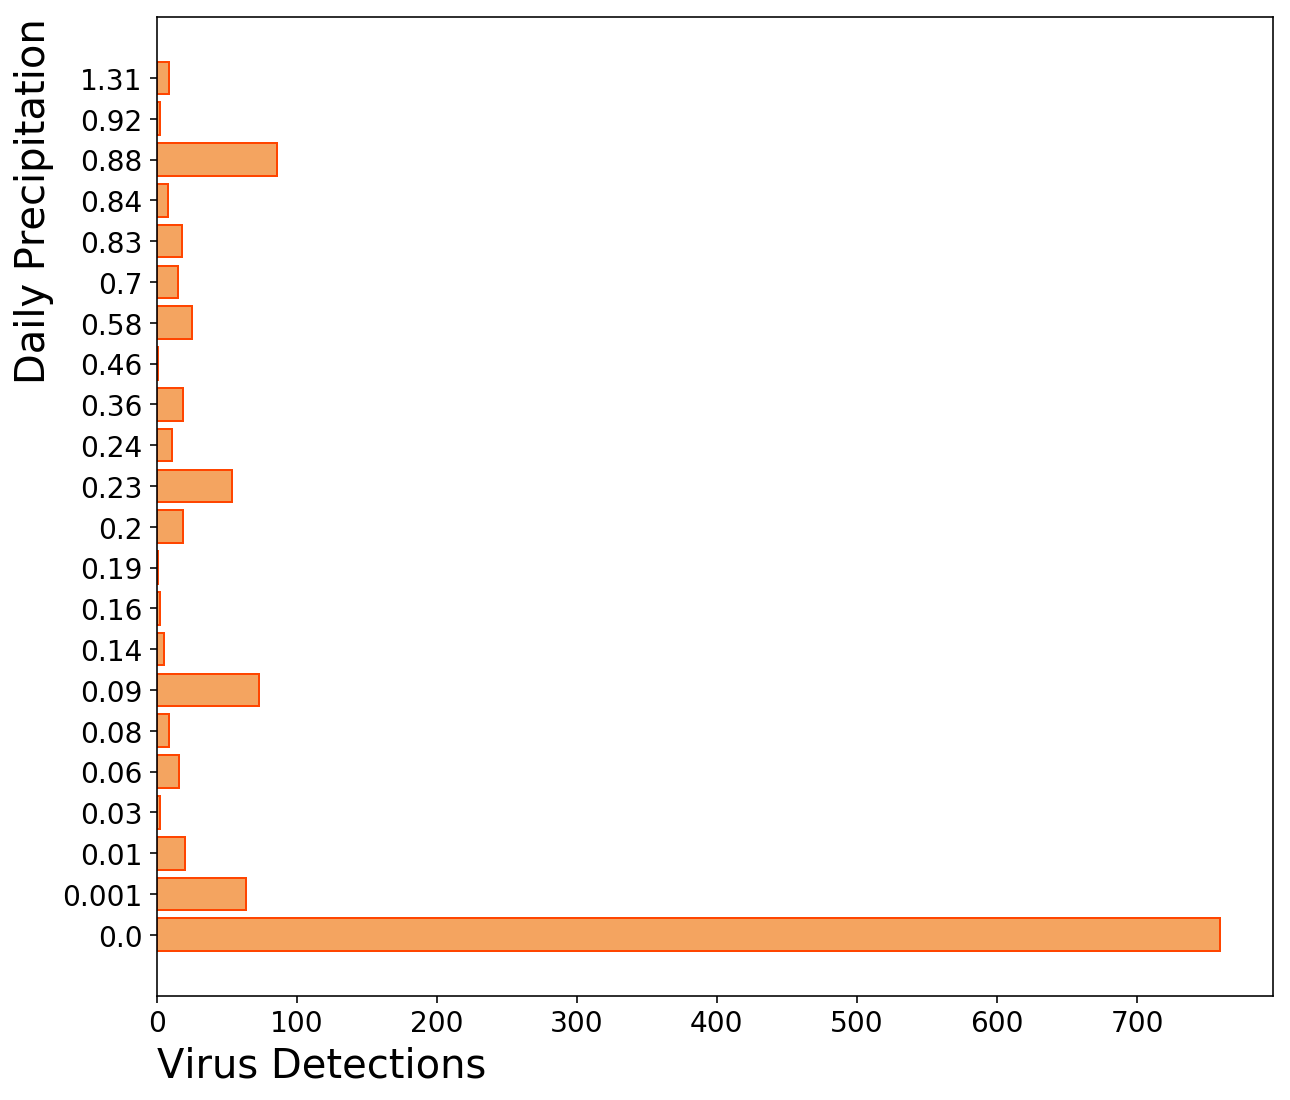

In [89]:
plt.figure(figsize=(10,9))
plt.barh(virus_by_precipitation['number'], virus_by_precipitation['WnvPresent'], 
         color = 'sandybrown', edgecolor = 'orangered')
plt.xticks(fontsize = 14)
plt.yticks(virus_by_precipitation['number'],virus_by_precipitation.index, fontsize = 14)
plt.ylabel('Daily Precipitation', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);

#range(len(virus_by_precipitation.index)),virus_by_precipitation.index,

In [99]:
virus_by_avgtemp = df[df['WnvPresent'] == 1].groupby(['Tavg']).sum()['WnvPresent']
virus_by_avgtemp = pd.DataFrame(virus_by_avgtemp)
virus_by_avgtemp

WnvPresent
Tavg            
52             2
54             2
55             8
56             3
57             2
63             3
65            18
66            14
69             2
70             3
71            76
72           186
73            84
74            35
75            48
76            69
77           114
78            66
79            27
80           218
81           109
82            76
83             3
84            33
86            16
87             1

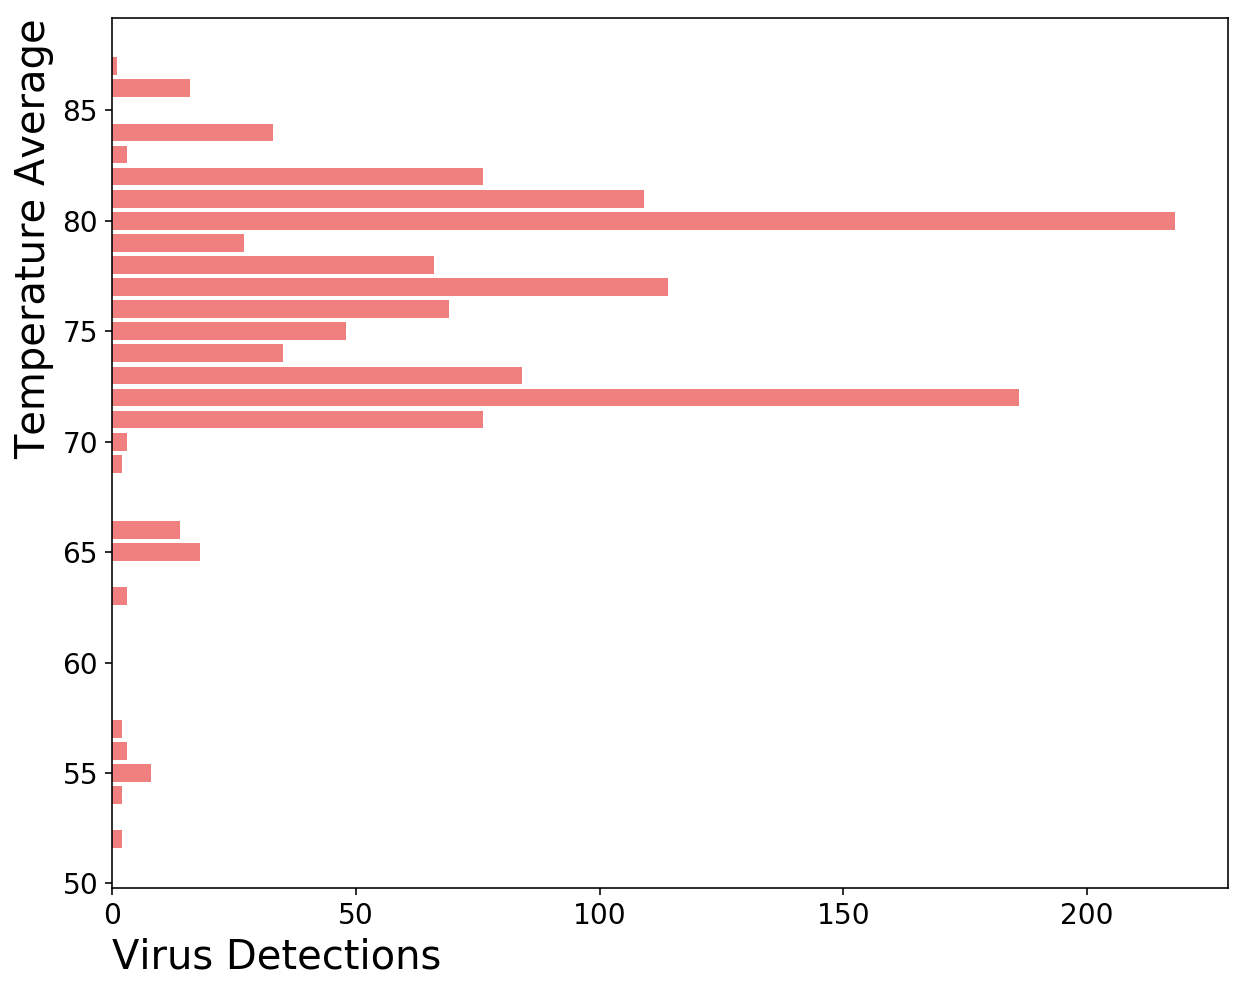

In [100]:
plt.figure(figsize=(10,8))
plt.barh(virus_by_avgtemp.index, virus_by_avgtemp['WnvPresent'], color = 'lightcoral')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Temperature Average', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);

In [101]:
virus_by_maxtemp = df[df['WnvPresent'] == 1].groupby(['Tmax']).sum()['WnvPresent']
virus_by_maxtemp = pd.DataFrame(virus_by_maxtemp)
virus_by_maxtemp

WnvPresent
Tmax            
58             2
59             2
62             8
66             3
67             2
70             1
74            11
75            23
77            91
78            66
79            20
80            64
81            87
82            39
83           118
84            46
85            33
86            69
87           110
88            15
89            42
90           174
91           125
92            21
93             4
94             1
96            25
97            16

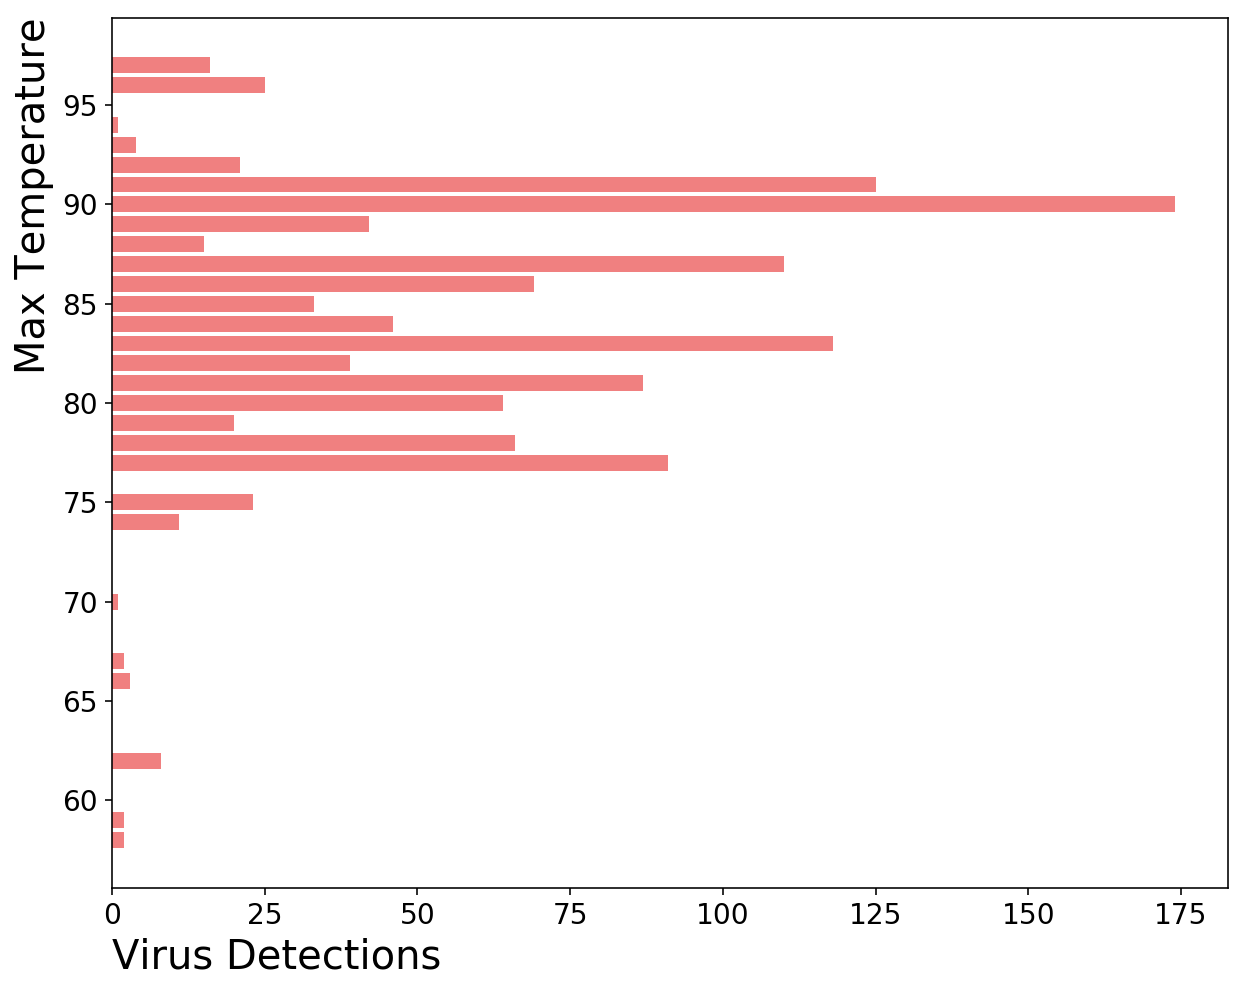

In [102]:
plt.figure(figsize=(10,8))
plt.barh(virus_by_maxtemp.index, virus_by_maxtemp['WnvPresent'], color = 'lightcoral')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Max Temperature', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);

In [93]:
virus_by_dewpoint = df[df['WnvPresent'] == 1].groupby(['DewPoint']).sum()['WnvPresent']
virus_by_dewpoint = pd.DataFrame(virus_by_dewpoint)
virus_by_dewpoint

WnvPresent
DewPoint            
38                 2
40                 2
42                 2
43                 3
44                 8
50                11
52                 6
53                21
54                42
55                39
56                26
57                37
58                51
59                75
60                70
61                18
62                62
63                50
64                36
65               191
66                65
67               100
68                17
69                49
70               145
71                 5
72                73
73                12

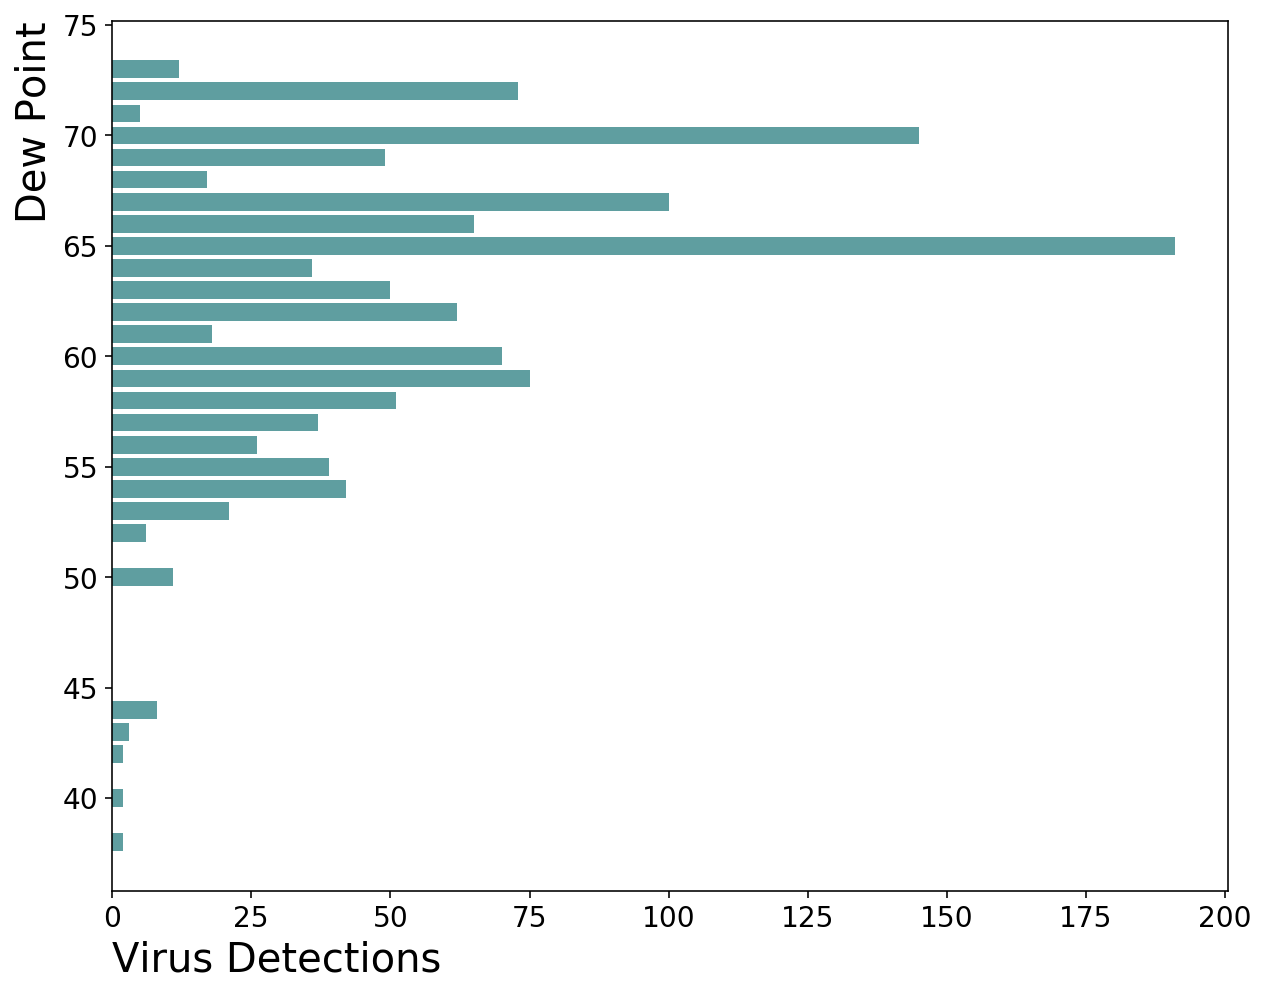

In [98]:
plt.figure(figsize=(10,8))
plt.barh(virus_by_dewpoint.index, virus_by_dewpoint['WnvPresent'], color = 'cadetblue')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Dew Point', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);

In [105]:
virus_by_speed = df[df['WnvPresent'] == 1].groupby(['ResultSpeed']).sum()['WnvPresent']
virus_by_speed = pd.DataFrame(virus_by_speed)
virus_by_speed['number'] = range(virus_by_speed.shape[0])
virus_by_speed

WnvPresent  number
ResultSpeed                    
0.1                   2       0
1.1                   1       1
1.2                   2       2
1.4                   2       3
1.5                 101       4
1.8                   2       5
1.9                   6       6
2.0                   2       7
2.1                  44       8
2.2                   2       9
2.5                  15      10
2.6                   2      11
2.7                   1      12
2.8                   6      13
3.1                   1      14
3.3                   7      15
3.4                  41      16
3.5                 144      17
3.8                  18      18
3.9                  36      19
4.0                  16      20
4.1                   8      21
4.2                  30      22
4.3                  26      23
4.5                  11      24
4.6                   2      25
4.7                  37      26
4.9                  26      27
5.1                  86      28
5.2                   4      29
5.4                   1      30
5.5                  19      31
5.8                  11      32
5.9                  12      33
6.1                  27      34
6.2                  15      35
6.3                   3      36
6.4                 102      37
6.5                  22      38
6.8                  13      39
7.0                  19      40
7.6                  32      41
7.8                  89      42
8.2                   4      43
8.3                  25      44
8.6                  23      45
8.7                   1      46
8.9                   5      47
9.0                   1      48
9.1                  14      49
9.2                   2      50
10.0                 11      51
10.3                  2      52
10.5                 34      53
12.8                  9      54
13.3                 25      55
13.4                 16      56

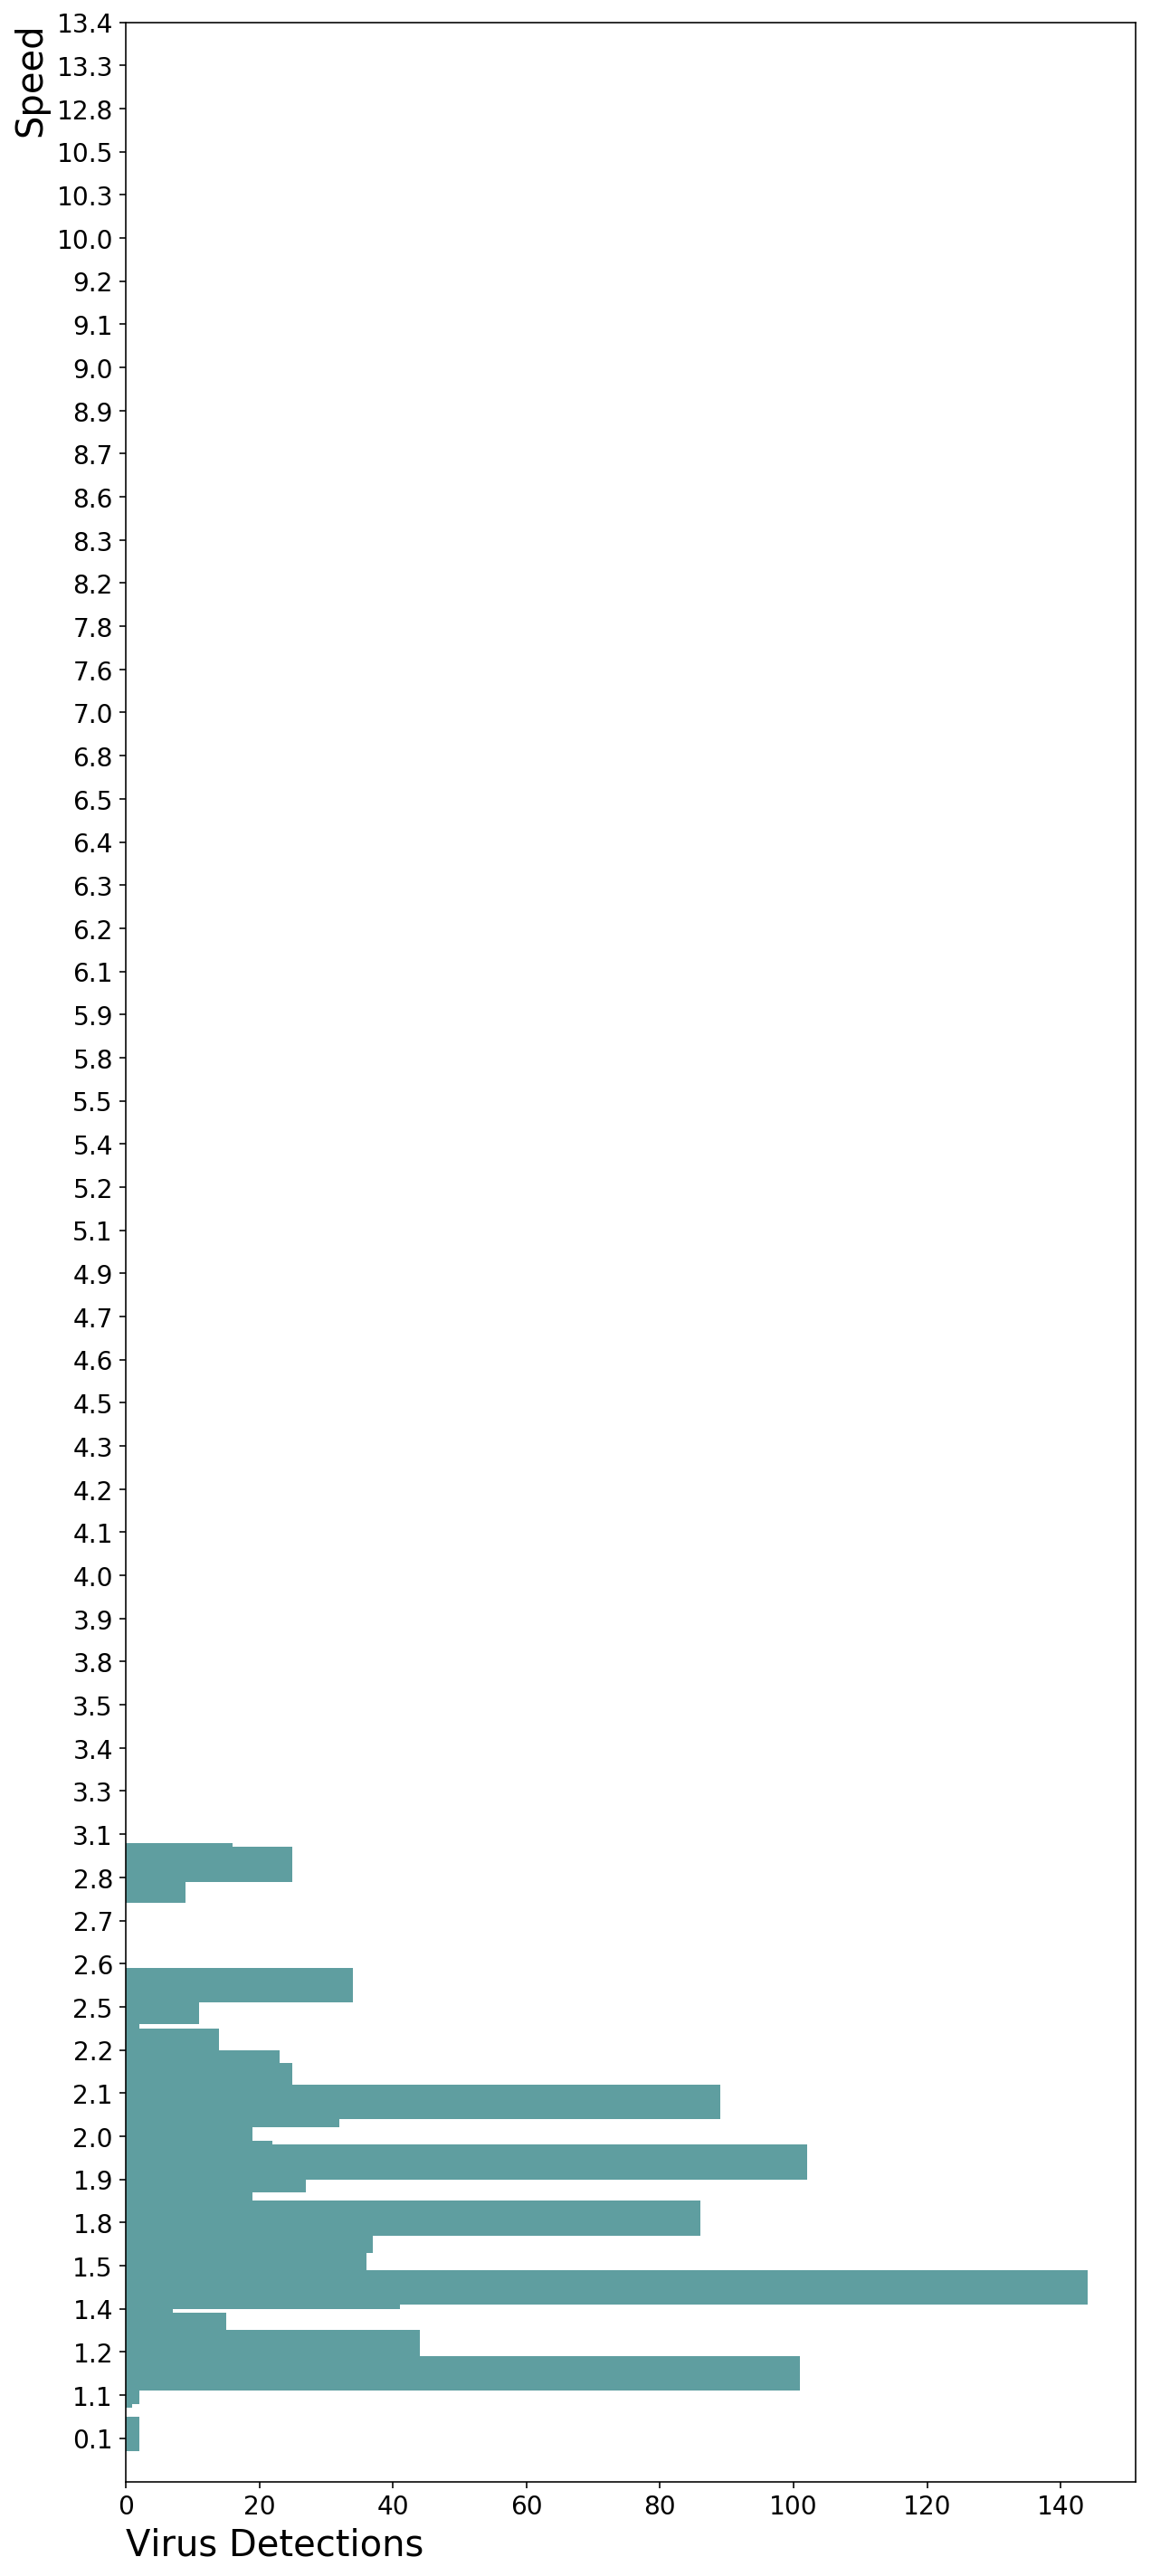

In [109]:
plt.figure(figsize=(10,25))
plt.barh(virus_by_speed.index, virus_by_speed['WnvPresent'], color = 'cadetblue')
plt.xticks(fontsize = 14)
plt.yticks(virus_by_speed['number'],virus_by_speed.index,fontsize = 14)
plt.ylabel('Speed', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);

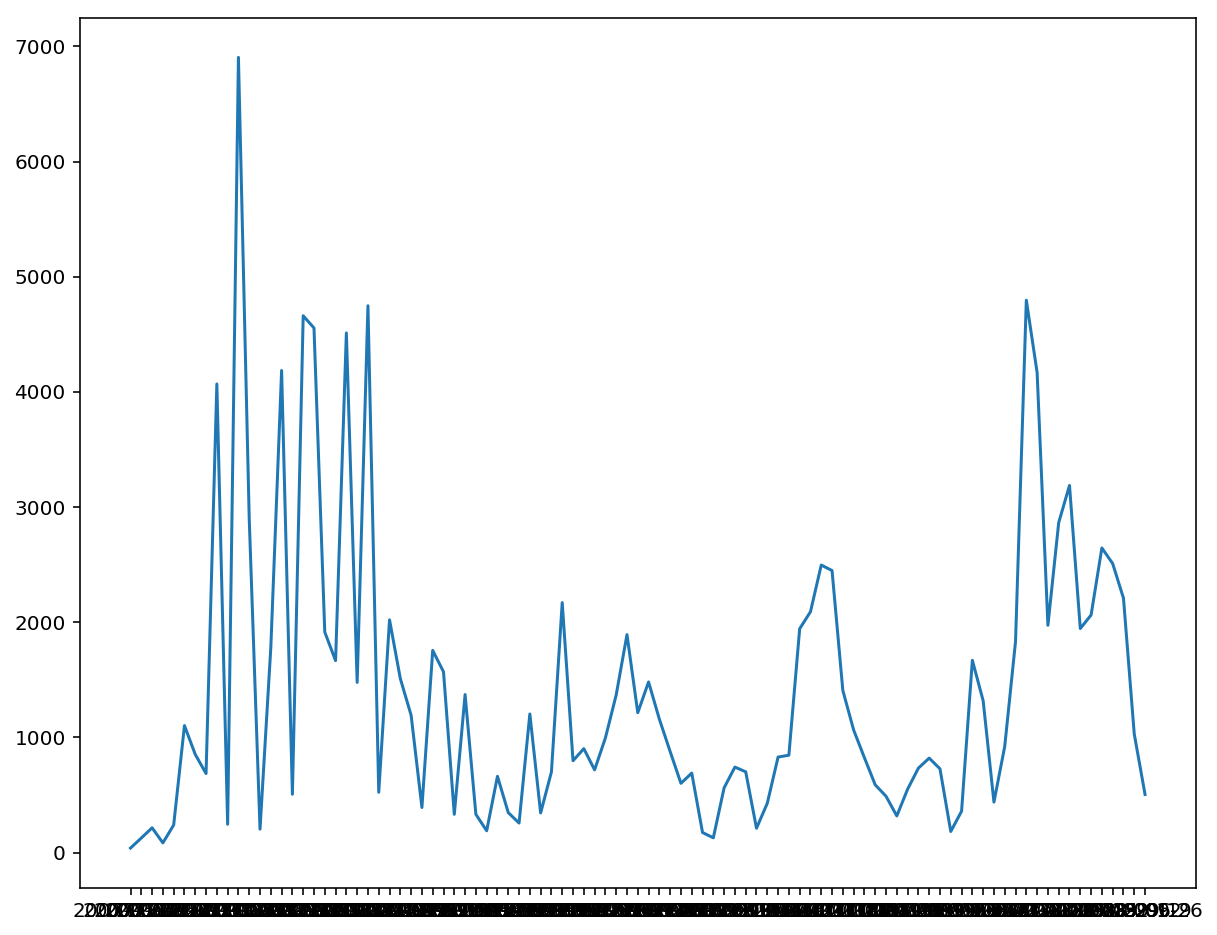

In [122]:
train = pd.read_csv('../data/train.csv')
train.set_index('Date', inplace = True)
plt.figure(figsize = (10,8))
plt.plot(train.groupby(train.index)['NumMosquitos'].sum());